In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [25]:
sns.set(style="white", palette="muted", color_codes=True)

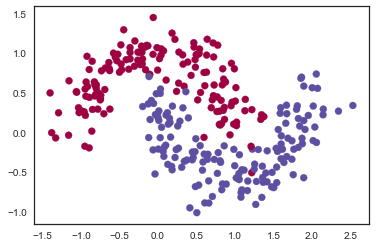

In [26]:
X, y = make_moons(n_samples=300, noise = 0.2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

In [27]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Accuracy: 0.840000
Precision: 0.904762
Recall: 0.826087
F1-score: 0.863636


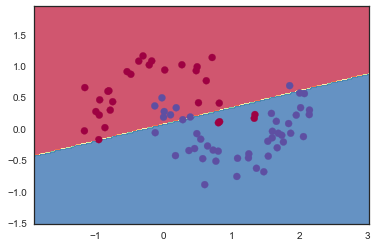

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy: %f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %f" % metrics.precision_score(y_test, y_pred))
print("Recall: %f" % metrics.recall_score(y_test, y_pred))
print("F1-score: %f" % metrics.f1_score(y_test, y_pred))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.Spectral)

Accuracy: 0.960000
Precision: 0.968750
Recall: 0.939394
F1-score: 0.953846


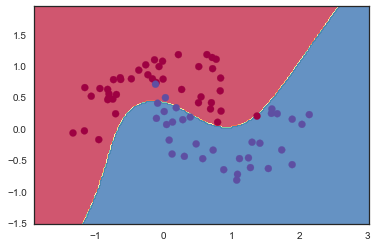

In [29]:
degree = 3
poly = PolynomialFeatures(degree, include_bias=False)
X_ = poly.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_, y)
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy: %f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %f" % metrics.precision_score(y_test, y_pred))
print("Recall: %f" % metrics.recall_score(y_test, y_pred))
print("F1-score: %f" % metrics.f1_score(y_test, y_pred))
Z = model.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.Spectral)

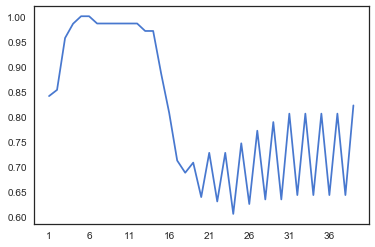

In [30]:
# f1_score与指数关系
f1 = []
x_train, x_test, y_train, y_test = train_test_split(X, y)
degrees = np.arange(1,40)
for degree in degrees:
    poly = PolynomialFeatures(degree, include_bias=False)
#     X_ = poly.fit_transform(X)
#     x_train, x_test, y_train, y_test = train_test_split(X_, y)
    x_train_ = poly.fit_transform(x_train)
    x_test_ = poly.fit_transform(x_test)
    model = LogisticRegression(random_state=0)
    model.fit(x_train_, y_train)
    y_pred = model.predict(x_test_)
    f1.append(metrics.f1_score(y_test, y_pred))

plt.xticks(np.arange(1,40,5))
plt.plot(degrees, f1)